### PCA
Principal Components Analysis
El objetivo principal de PCA es reducir la dimensionalidad. Que es la dimensionalidad y como lo hace?.

Sea la variable X^* una representacion de los datos en una menor dimension. El Objetivo es que si reconstruimos los datos al espacio original se pierda la menor cantidad de informacion.

Los datos se deben centrar antes de realizar cualquier projeccion.

$Y_{n,k} = (X_{n,d}-\mu_d) . W_{d,k}$


$X^*_{n,d} = Y_{n,k}.W^{-1}_{k,d}$


Como $W^{-1}_{k,d}$ es ortonormal, la inversa es la transpuesta $W^{-1}_{k,d}= W^T$.


$Min (X-X^*)^2$ , $W^T.W=I$

$=((X-\mu) - Y_{n,k}.W^{-1}_{k,d} )^2$ 


$=((X-\mu) - (X_{n,d}-\mu)W_{d,k}W^{-1}_{k,d})^2$ 
 
 
 Sin embargo, minimizar el error, es similar a maximizar 

$S = W^T \Sigma W$

$S=\sum_{i=1}^D{(X-\mu)(X-\mu)}^T$

$X_{n,d}- X_{n,k}^* = \sum_{i=1}^D{ W_i^T \Sigma W_i} - \sum_{i=1}^K{ W_i^T \Sigma W_i}$

Para reducir el error, las varianzas de los primeros k elementos van a ser mas grandes.

$det(A-\lambda)=0$

$m = [[1 2 4]
      [3 5 6]
      [1 0 2]]$

In [9]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import tarfile
import zipfile
from scipy.io import loadmat
from urllib.request import urlretrieve
from os.path import isfile, isdir
import seaborn as sns; sns.set()
%matplotlib inline
from sklearn.decomposition import PCA

## PCA

### 1. Calcular la mean face. Que es la cara con el promedio de los pixeles y visualizarla

In [3]:
from scipy.io import loadmat
import glob
import random
import matplotlib.image as img
#Install pillow
from PIL import Image

d_name = 'data/rawdata'
sample = 0.2
X = []
for nfile in  os.listdir(d_name):
    if random.random() <= sample:
        bytes_read = open(os.path.join(d_name,nfile), "rb").read()
        img = Image.frombytes('L', (128,128), bytes_read)
        X.append(np.array(img).flatten())

X = np.array(X)

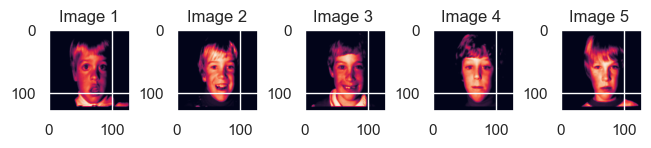

In [4]:
def plot_1_images(data, label="Image 1", ax=None):
    fn_shape = lambda X: X.reshape(128,128)
    fig = None
    if ax is None:
        fig, ax = plt.subplots(1,1, constrained_layout=True)
    ax.imshow(fn_shape(data))
    ax.set_title(label=label)
    return fig,ax
def plot_3_images(data,ix_1, ix_2 , ix_3):
    fn_shape = lambda X: X.reshape(128,128)
    fig, ax = plt.subplots(1,3, constrained_layout=True)
    ax[0].imshow(fn_shape(data[ix_1]))
    ax[0].set_title(label="Image %s"% ix_1)
    ax[1].imshow(fn_shape(data[ix_2]))
    ax[1].set_title(label="Image %s"% ix_2)
    ax[2].imshow(fn_shape(data[ix_2]))
    ax[2].set_title(label="Image %s "% ix_3)
    plt.show()
def plot_5_images(data,ix_1, ix_2 , ix_3,ix_4,ix_5):
    fn_shape = lambda X: X.reshape(128,128)
    fig, ax = plt.subplots(1,5, constrained_layout=True)
    ax[0].imshow(fn_shape(data[ix_1]))
    ax[0].set_title(label="Image %s"% ix_1)
    ax[1].imshow(fn_shape(data[ix_2]))
    ax[1].set_title(label="Image %s"% ix_2)
    ax[2].imshow(fn_shape(data[ix_3]))
    ax[2].set_title(label="Image %s "% ix_3)
    ax[3].imshow(fn_shape(data[ix_4]))
    ax[3].set_title(label="Image %s "% ix_4)
    ax[4].imshow(fn_shape(data[ix_5]))
    ax[4].set_title(label="Image %s "% ix_5)
    plt.show()

plot_5_images(X,1,2,3,4,5)

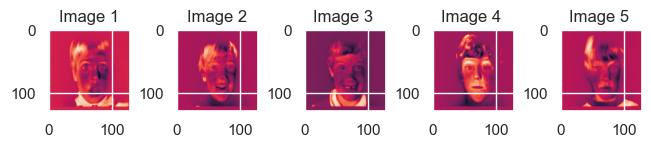

In [5]:
X_mean = X.mean(axis=0)
X_center = X - X_mean
plot_5_images(X_center,1, 2 ,3,4,5)

## Centrar los datos, utilizar PCA

In [10]:
pca = PCA(n_components=200)
X_reduced = pca.fit_transform(X_center)
eigen_values = pca.explained_variance_
eigen_faces = pca.components_

### ¿Cuántos componentes se deben utilizar para mantener el 90% de las características? 

el 90% de la información o varianza de los datos originales se puede mantener con los 180 primeros componentes principales (también llamados "eigenfaces" en el contexto del reconocimiento facial). Esto significa que el resto de los componentes tienen una contribución menor al total de la varianza de los datos, por lo que se pueden eliminar sin perder mucha información.

## MeanFace +  Comp
Crear una tabla para mostrar las primeras 5 caras utilizando, la mean face + los datos reconstruidos utilizando la primera componente, después con 5 componentes, después con las primeras 10 componentes, después con las componentes que explican el 90% de la varianza
y por último con el numero de componentes que tiene el 99% de la varianza

#### IMAGEN 1

(None, <Axes: title={'center': 'Con 99 porciento eigenfaces'}>)

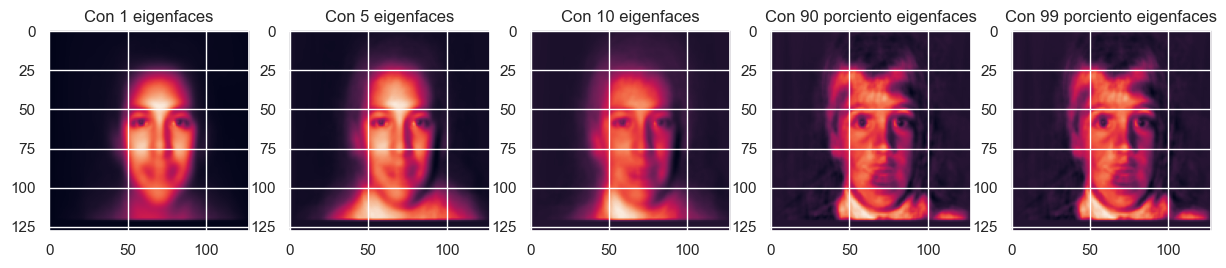

In [11]:
face_1 = X_mean + np.sum(np.dot(X_reduced[1].reshape(1,-1)[:,:1], eigen_faces[:1,:]), axis=0)
face_5 = X_mean + np.sum(np.dot(X_reduced[1].reshape(1,-1)[:,:5],  eigen_faces[:5,:]), axis=0)
face_10 = X_mean + np.sum(np.dot(X_reduced[1].reshape(1,-1)[:,:10],  eigen_faces[:10,:]), axis=0)
face_90 = X_mean + np.sum(np.dot(X_reduced[1].reshape(1,-1)[:,:180], eigen_faces[:180,:]),  axis=0)
face_99 = X_mean + np.sum(np.dot(X_reduced[1].reshape(1,-1)[:,:198], eigen_faces[:198,:]),  axis=0)

fig, ax = plt.subplots(1,5,figsize=(15,15))



plot_1_images(face_1,ax=ax[0],label="Con 1 eigenfaces")
plot_1_images(face_5,ax=ax[1],label="Con 5 eigenfaces")
plot_1_images(face_10,ax=ax[2],label="Con 10 eigenfaces")
plot_1_images(face_90,ax=ax[3],label="Con 90 porciento eigenfaces")
plot_1_images(face_90,ax=ax[4],label="Con 99 porciento eigenfaces")

#### IMAGEN 2

(None, <Axes: title={'center': 'Con 99 porciento eigenfaces'}>)

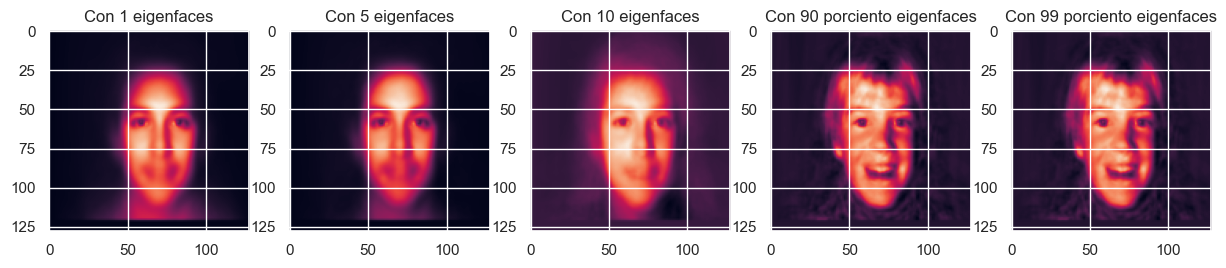

In [12]:
face_1 = X_mean + np.sum(np.dot(X_reduced[2].reshape(1,-1)[:,:1], eigen_faces[:1,:]), axis=0)
face_5 = X_mean + np.sum(np.dot(X_reduced[2].reshape(1,-1)[:,:5],  eigen_faces[:5,:]), axis=0)
face_10 = X_mean + np.sum(np.dot(X_reduced[2].reshape(1,-1)[:,:10],  eigen_faces[:10,:]), axis=0)
face_90 = X_mean + np.sum(np.dot(X_reduced[2].reshape(1,-1)[:,:180], eigen_faces[:180,:]),  axis=0)
face_99 = X_mean + np.sum(np.dot(X_reduced[2].reshape(1,-1)[:,:198], eigen_faces[:198,:]),  axis=0)

fig, ax = plt.subplots(1,5,figsize=(15,15))



plot_1_images(face_1,ax=ax[0],label="Con 1 eigenfaces")
plot_1_images(face_5,ax=ax[1],label="Con 5 eigenfaces")
plot_1_images(face_10,ax=ax[2],label="Con 10 eigenfaces")
plot_1_images(face_90,ax=ax[3],label="Con 90 porciento eigenfaces")
plot_1_images(face_90,ax=ax[4],label="Con 99 porciento eigenfaces")

#### IMAGEN 3

(None, <Axes: title={'center': 'Con 99 porciento eigenfaces'}>)

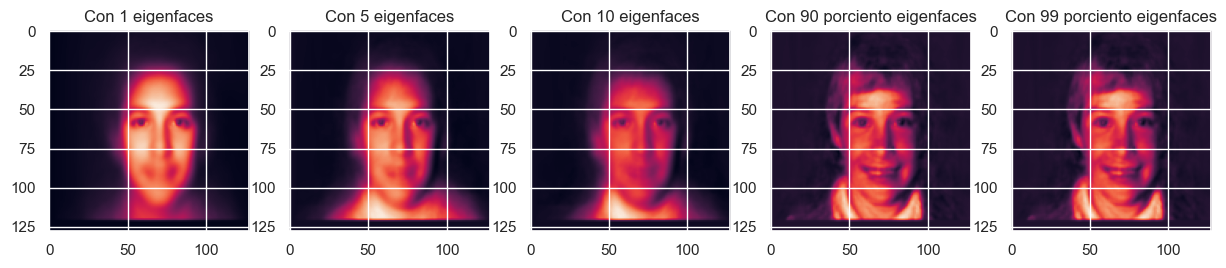

In [13]:
face_1 = X_mean + np.sum(np.dot(X_reduced[3].reshape(1,-1)[:,:1], eigen_faces[:1,:]), axis=0)
face_5 = X_mean + np.sum(np.dot(X_reduced[3].reshape(1,-1)[:,:5],  eigen_faces[:5,:]), axis=0)
face_10 = X_mean + np.sum(np.dot(X_reduced[3].reshape(1,-1)[:,:10],  eigen_faces[:10,:]), axis=0)
face_90 = X_mean + np.sum(np.dot(X_reduced[3].reshape(1,-1)[:,:180], eigen_faces[:180,:]),  axis=0)
face_99 = X_mean + np.sum(np.dot(X_reduced[3].reshape(1,-1)[:,:198], eigen_faces[:198,:]),  axis=0)

fig, ax = plt.subplots(1,5,figsize=(15,15))



plot_1_images(face_1,ax=ax[0],label="Con 1 eigenfaces")
plot_1_images(face_5,ax=ax[1],label="Con 5 eigenfaces")
plot_1_images(face_10,ax=ax[2],label="Con 10 eigenfaces")
plot_1_images(face_90,ax=ax[3],label="Con 90 porciento eigenfaces")
plot_1_images(face_90,ax=ax[4],label="Con 99 porciento eigenfaces")

#### IMAGEN 4

(None, <Axes: title={'center': 'Con 99 porciento eigenfaces'}>)

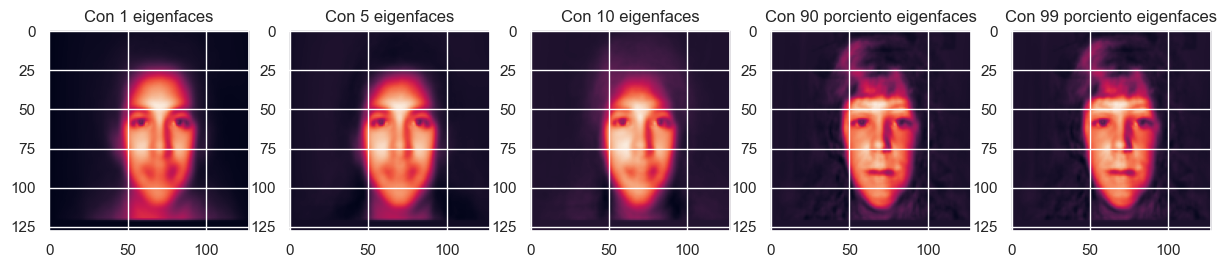

In [14]:
face_1 = X_mean + np.sum(np.dot(X_reduced[4].reshape(1,-1)[:,:1], eigen_faces[:1,:]), axis=0)
face_5 = X_mean + np.sum(np.dot(X_reduced[4].reshape(1,-1)[:,:5],  eigen_faces[:5,:]), axis=0)
face_10 = X_mean + np.sum(np.dot(X_reduced[4].reshape(1,-1)[:,:10],  eigen_faces[:10,:]), axis=0)
face_90 = X_mean + np.sum(np.dot(X_reduced[4].reshape(1,-1)[:,:180], eigen_faces[:180,:]),  axis=0)
face_99 = X_mean + np.sum(np.dot(X_reduced[4].reshape(1,-1)[:,:198], eigen_faces[:198,:]),  axis=0)

fig, ax = plt.subplots(1,5,figsize=(15,15))



plot_1_images(face_1,ax=ax[0],label="Con 1 eigenfaces")
plot_1_images(face_5,ax=ax[1],label="Con 5 eigenfaces")
plot_1_images(face_10,ax=ax[2],label="Con 10 eigenfaces")
plot_1_images(face_90,ax=ax[3],label="Con 90 porciento eigenfaces")
plot_1_images(face_90,ax=ax[4],label="Con 99 porciento eigenfaces")

#### IMAGEN 5

(None, <Axes: title={'center': 'Con 99 porciento eigenfaces'}>)

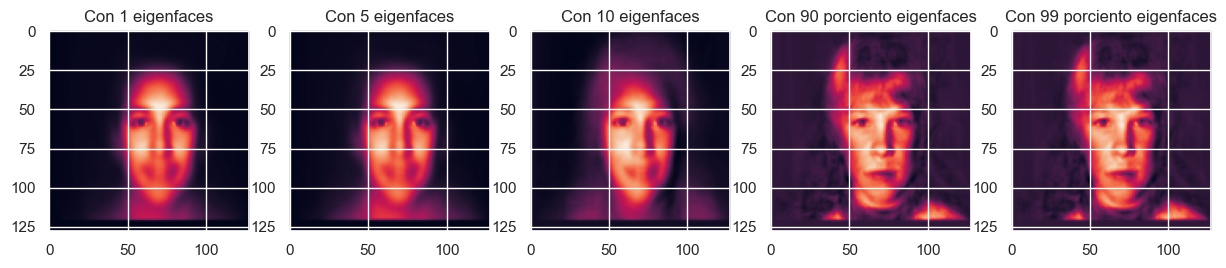

In [15]:
face_1 = X_mean + np.sum(np.dot(X_reduced[5].reshape(1,-1)[:,:1], eigen_faces[:1,:]), axis=0)
face_5 = X_mean + np.sum(np.dot(X_reduced[5].reshape(1,-1)[:,:5],  eigen_faces[:5,:]), axis=0)
face_10 = X_mean + np.sum(np.dot(X_reduced[5].reshape(1,-1)[:,:10],  eigen_faces[:10,:]), axis=0)
face_90 = X_mean + np.sum(np.dot(X_reduced[5].reshape(1,-1)[:,:180], eigen_faces[:180,:]),  axis=0)
face_99 = X_mean + np.sum(np.dot(X_reduced[5].reshape(1,-1)[:,:198], eigen_faces[:198,:]),  axis=0)

fig, ax = plt.subplots(1,5,figsize=(15,15))



plot_1_images(face_1,ax=ax[0],label="Con 1 eigenfaces")
plot_1_images(face_5,ax=ax[1],label="Con 5 eigenfaces")
plot_1_images(face_10,ax=ax[2],label="Con 10 eigenfaces")
plot_1_images(face_90,ax=ax[3],label="Con 90 porciento eigenfaces")
plot_1_images(face_90,ax=ax[4],label="Con 99 porciento eigenfaces")

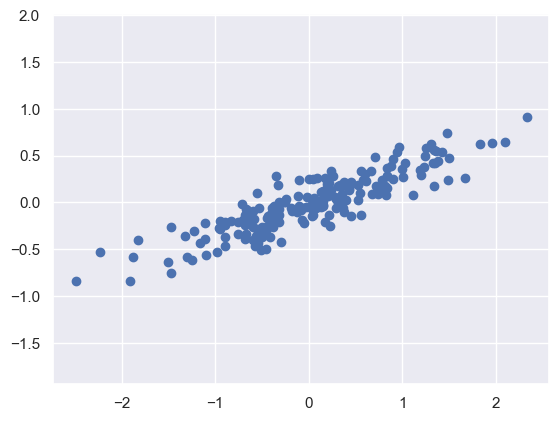

In [2]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

In [3]:
m = np.mean(X,axis=0)
m

array([ 0.03351168, -0.00408072])

In [4]:
#calcular media
m = np.mean(X,axis=0)
X_center = X - m
X_center.mean(axis=0)
S = np.dot(X_center.T,X_center)
S.shape

(2, 2)

In [5]:
S = np.dot(X_center.T,X_center)
S

array([[135.75334359,  45.9560144 ],
       [ 45.9560144 ,  19.6675263 ]])

In [6]:
# eigenvectors and eigenvalues for the from the scatter matrix
eig_val_sc, eig_vec_sc = np.linalg.eig(S)
eig_val_sc, eig_vec_sc

(array([151.74376868,   3.67710121]),
 array([[ 0.94446029, -0.32862557],
        [ 0.32862557,  0.94446029]]))

$W_{2,2}$

$W_{1,2} * X_{2,200}= X^*_{1,200}$ 

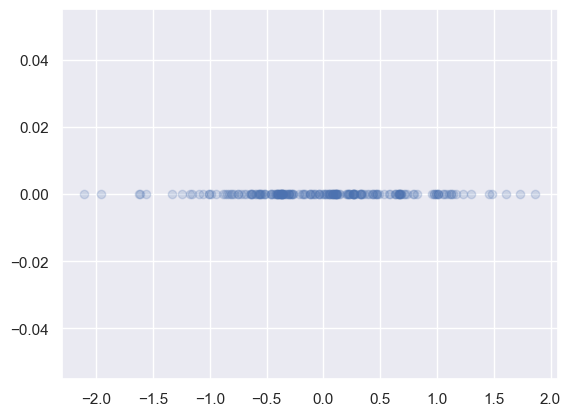

In [7]:
X_star = np.dot(X_center,eig_vec_sc[0,:].reshape(2,1))
Y = X_star *0
plt.scatter(X_star, Y, alpha=0.2)

ValueError: too many values to unpack (expected 2)

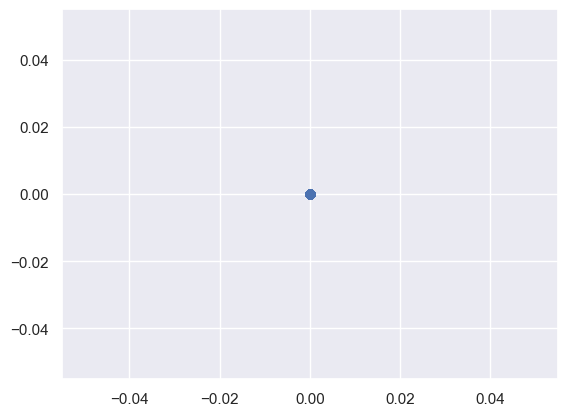

In [28]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0,
                    shrinkB=0,
                    color='r')
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

## EigenFaces
Vamos a utilizar las famosas Eigen faces, para mostrar como PCA puede ayudarnos en la practica

In [9]:
if not os.path.exists('data'):
         os.makedirs('data')

In [29]:
def download_files():
    """
    Este metodo descarga los archivos de imagenes sino existen
    """
    path_tar = os.path.join("data",'faces.zip')
    if not isfile(path_tar):
        urlretrieve(
            'http://courses.media.mit.edu/2002fall/mas622j/proj/faces/rawdata.zip',
            path_tar)
    dest_path =  "data/faces"
    with zipfile.ZipFile(path_tar) as tar:
        tar.extractall(dest_path)
        tar.close()
download_files()

In [30]:
from scipy.io import loadmat
import glob
import random
import matplotlib.image as img
#Install pillow
from PIL import Image

d_name = 'data/faces/rawdata'
sample = 0.2
X = []
for nfile in  os.listdir(d_name):
    if random.random() <= sample:
        bytes_read = open(os.path.join(d_name,nfile), "rb").read()
        img = Image.frombytes('L', (128,128), bytes_read)
        X.append(np.array(img).flatten())

X = np.array(X)

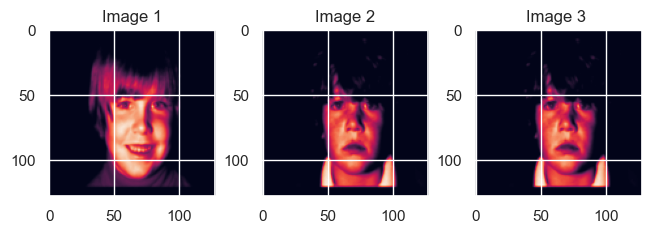

In [15]:
def plot_1_images(data, label="Image 1", ax=None):
    fn_shape = lambda X: X.reshape(128,128)
    fig = None
    if ax is None:
        fig, ax = plt.subplots(1,1, constrained_layout=True)
    ax.imshow(fn_shape(data))
    ax.set_title(label=label)
    return fig,ax

def plot_3_images(data,ix_1, ix_2 , ix_3):
    fn_shape = lambda X: X.reshape(128,128)
    fig, ax = plt.subplots(1,3, constrained_layout=True)
    ax[0].imshow(fn_shape(data[ix_1]))
    ax[0].set_title(label="Image %s"% ix_1)
    ax[1].imshow(fn_shape(data[ix_2]))
    ax[1].set_title(label="Image %s"% ix_2)
    ax[2].imshow(fn_shape(data[ix_2]))
    ax[2].set_title(label="Image %s "% ix_3)
    plt.show()
plot_3_images(X,1, 2 , 3)

### Paso 1, Quitar la media de los datos.

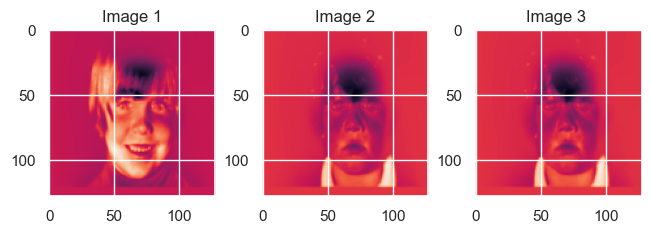

In [16]:
X_mean = X.mean(axis=0)
X_center = X - X_mean
plot_3_images(X_center,1, 2 ,3)

(<Figure size 640x480 with 1 Axes>, <Axes: title={'center': 'Image 1'}>)

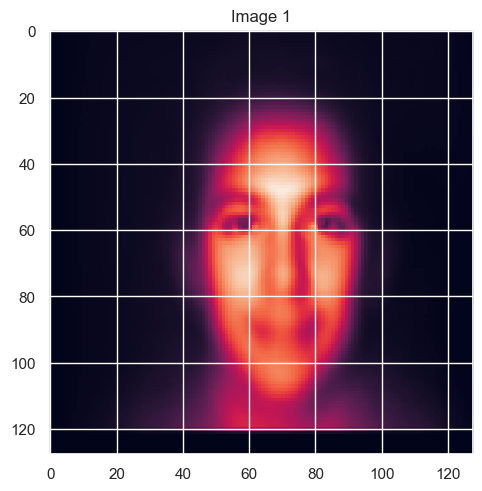

In [17]:
plot_1_images(X_mean)

## Paso 2, Calcular Matrix de Covarianza
Calcular eigenvalues y eigen vectors

In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components=200)
# images x dim
X_reduced = pca.fit_transform(X_center)

In [19]:
eigen_values = pca.explained_variance_
eigen_faces = pca.components_

In [20]:
eigen_values

array([7.97097755e+06, 2.39093242e+06, 1.94616628e+06, 1.01553043e+06,
       8.69391838e+05, 8.36852446e+05, 5.92002076e+05, 4.38576261e+05,
       3.50580623e+05, 3.19691880e+05, 2.52366694e+05, 2.39372582e+05,
       2.05581280e+05, 1.95436409e+05, 1.77494304e+05, 1.61589114e+05,
       1.47825735e+05, 1.42221415e+05, 1.25280850e+05, 1.21194470e+05,
       1.15410881e+05, 1.08963210e+05, 1.02234916e+05, 9.96986504e+04,
       9.54855942e+04, 9.26542173e+04, 8.87949455e+04, 8.43989145e+04,
       8.29906506e+04, 7.98395026e+04, 7.34601558e+04, 7.27173318e+04,
       6.67563630e+04, 6.43221171e+04, 6.20433383e+04, 6.07844797e+04,
       5.86276452e+04, 5.71020001e+04, 5.36944847e+04, 5.26503643e+04,
       5.14793264e+04, 4.96110400e+04, 4.78809262e+04, 4.60110226e+04,
       4.46292262e+04, 4.28342178e+04, 4.17931956e+04, 4.13811777e+04,
       4.10120765e+04, 4.01814845e+04, 3.90553187e+04, 3.69901648e+04,
       3.65200132e+04, 3.51799156e+04, 3.38871414e+04, 3.34588027e+04,
      

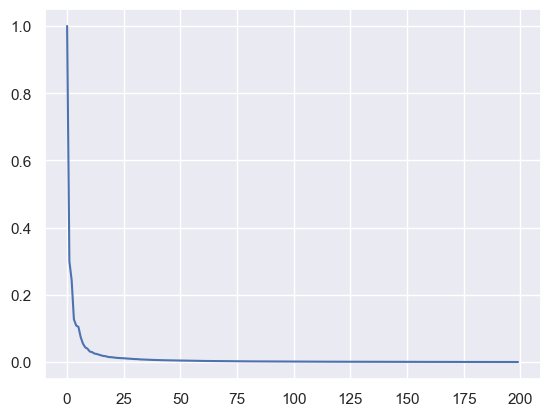

In [21]:
# Se puede ver como los primeras componentes contienen mas informacion
plt.plot(range(0,200), eigen_values/eigen_values[0])

(<Figure size 640x480 with 1 Axes>, <Axes: title={'center': 'Image 1'}>)

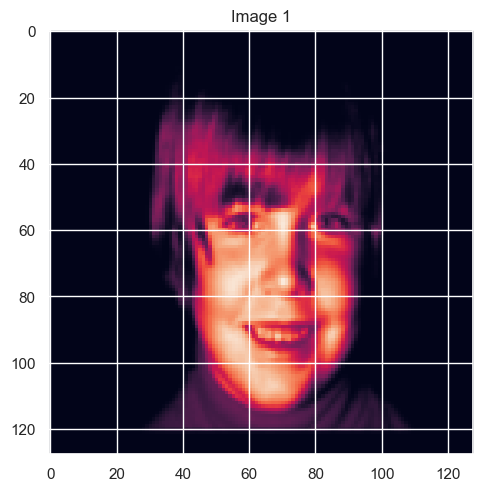

In [22]:
plot_1_images(X[1])

Si pintamos las dimensiones, no tienen sentido. Porque cada elemento representa una mezcla de los pixeles de la foto original.

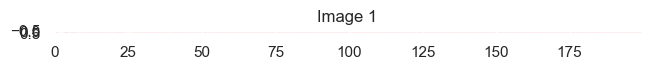

In [23]:
fig, ax = plt.subplots(1,1, constrained_layout=True)
ax.imshow(X_reduced[1].reshape(1,-1))
ax.set_title(label="Image 1")
plt.show()

### Paso 4 Reconstruir la imagen 

In [24]:
print('Componentes', X_reduced.shape)
print('Eigenvectores', eigen_faces.shape)
face_1 = np.dot(X_reduced[1].reshape(1,-1),eigen_faces)
print(face_1.sum(axis=0))

Componentes (808, 200)
Eigenvectores (200, 16384)
[ 8.92682873e-13 -3.89291723e-12  3.97137336e-02 ...  0.00000000e+00
  0.00000000e+00  0.00000000e+00]


In [25]:
eigen_faces[0].shape
face_c1 = np.dot(X_reduced[1].reshape(1,-1),eigen_faces)
face_c1.shape

(1, 16384)

(<Figure size 640x480 with 1 Axes>, <Axes: title={'center': 'Image 1'}>)

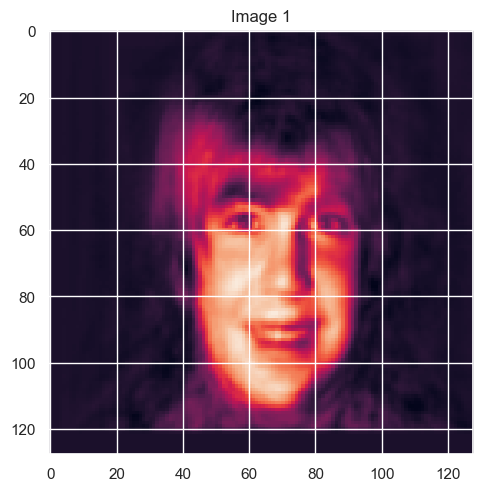

In [26]:
plot_1_images(X_mean + face_1.sum(axis=0) )

Vemos que la reconstruccion de las imagenes funciono bien utilizando 200 eigen vectores.

(None, <Axes: title={'center': 'Con 200 eigenfaces'}>)

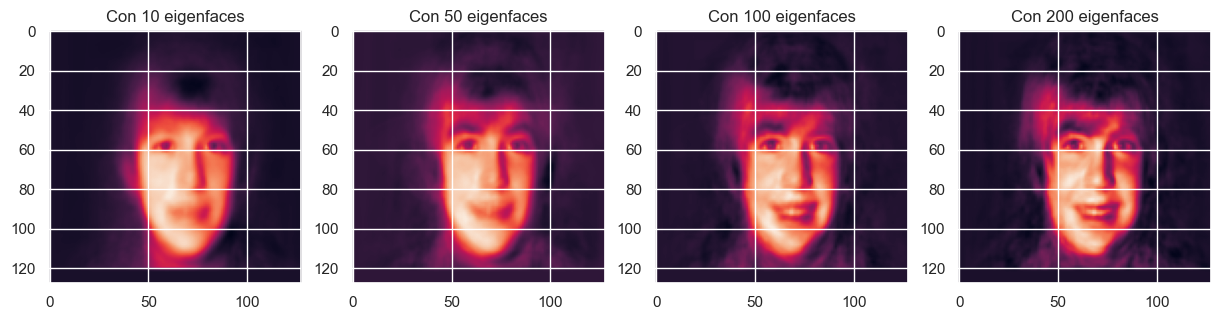

In [27]:

face_10 = X_mean + np.sum(np.dot(X_reduced[1].reshape(1,-1)[:,:10],
                                 eigen_faces[:10,:]),
                            axis=0)
face_50 = X_mean + np.sum(np.dot(X_reduced[1].reshape(1,-1)[:,:50],
                                      eigen_faces[:50,:]),
                               axis=0)


face_100 = X_mean + np.sum(np.dot(X_reduced[1].reshape(1,-1)[:,:100],
                                      eigen_faces[:100,:]),
                               axis=0)

face_200 = X_mean + np.sum(np.dot(X_reduced[1].reshape(1,-1)[:,:200],
                                     eigen_faces[:200,:]),
                              axis=0)
fig, ax = plt.subplots(1,4,figsize=(15,15))
plot_1_images(face_10,ax=ax[0],label="Con 10 eigenfaces")
plot_1_images(face_50,ax=ax[1],label="Con 50 eigenfaces")
plot_1_images(face_100,ax=ax[2],label="Con 100 eigenfaces")
plot_1_images(face_200,ax=ax[3],label="Con 200 eigenfaces")

Como se puede ver en la imagen anterior. Las caracteristicas mas importantes son las formas de la cara. Despues las cejas y los ojos. Y por ultimo los detalles como el cabello, la boca y color de piel.

### Distancia utilizando PCA
Despues de demostrar que 200 eigenvectors contienen la cantidad de informacion necesaria para reconstruir la imagen con calidad. Utilizaremos esas 200 dimensiones para encontrar las fotos mas similares.

In [28]:
min_dis = 100000000000000000
ix_1 = 0
ix_2 = 0
for i in range(200):
    for j in range(i+1,200):
        # excluir imagen en negro
        if np.sum(X_reduced[i])>0:
            dis_ij = sum(abs(X_reduced[i]-X_reduced[j]))
            if dis_ij < min_dis:
                min_dis = dis_ij
                ix_1 = i
                ix_2 = j
print("Imagenes similares son {0} y {1}".format(ix_1,ix_2))

Imagenes similares son 186 y 194


(<Figure size 640x480 with 1 Axes>, <Axes: title={'center': 'Image 1'}>)

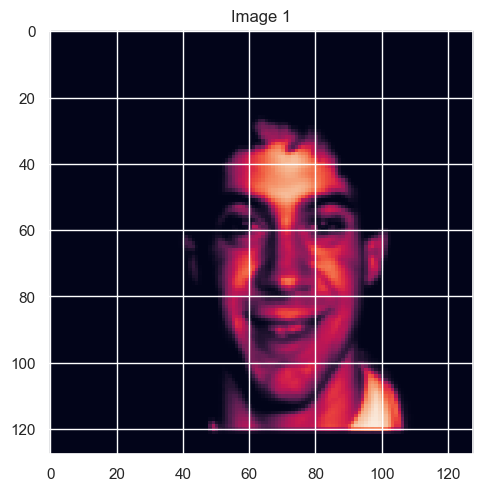

In [29]:
plot_1_images(X[ix_1])

(<Figure size 640x480 with 1 Axes>, <Axes: title={'center': 'Image 1'}>)

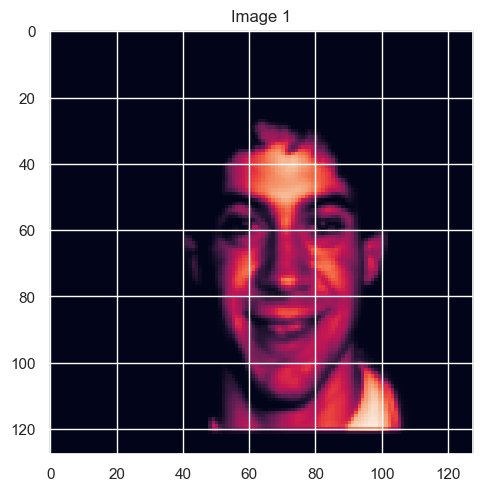

In [30]:
plot_1_images(X[ix_2])